In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('bundle.csv')

In [3]:
df.shape

(1048575, 23)

In [4]:
df.head().T

,0,1,2,3,4
sku,1026827,1043384,1043696,1043852,1044048
national_inv,0,2,2,7,8
lead_time,NaN,9,NaN,8,NaN
in_transit_qty,0,0,0,0,0
forecast_3_month,0,0,0,0,0
forecast_6_month,0,0,0,0,0
forecast_9_month,0,0,0,0,0
sales_1_month,0,0,0,0,0
sales_3_month,0,0,0,0,0
sales_6_month,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1048575 non-null  int64  
 1   national_inv       1048575 non-null  int64  
 2   lead_time          984057 non-null   float64
 3   in_transit_qty     1048575 non-null  int64  
 4   forecast_3_month   1048575 non-null  int64  
 5   forecast_6_month   1048575 non-null  int64  
 6   forecast_9_month   1048575 non-null  int64  
 7   sales_1_month      1048575 non-null  int64  
 8   sales_3_month      1048575 non-null  int64  
 9   sales_6_month      1048575 non-null  int64  
 10  sales_9_month      1048575 non-null  int64  
 11  min_bank           1048575 non-null  int64  
 12  potential_issue    1048575 non-null  object 
 13  pieces_past_due    1048575 non-null  int64  
 14  perf_6_month_avg   1048575 non-null  float64
 15  perf_12_month_avg  1048575 non-n

In [6]:
df.isnull().sum().sort_values(ascending=False)[:10]

lead_time            64518
went_on_backorder        0
sales_9_month            0
national_inv             0
in_transit_qty           0
forecast_3_month         0
forecast_6_month         0
forecast_9_month         0
sales_1_month            0
sales_3_month            0
dtype: int64

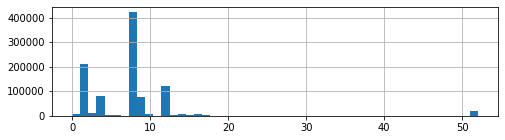

In [7]:
df['lead_time'].hist(bins=50,figsize=(8,2))

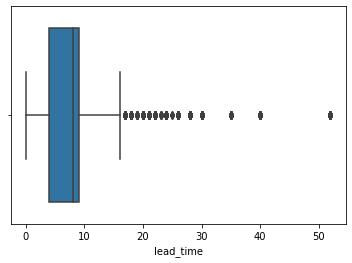

In [8]:
sns.boxplot(df['lead_time'])

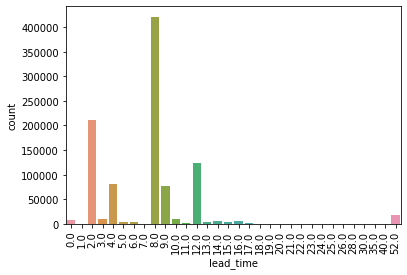

In [9]:
plt.xticks(rotation='vertical')
sns.countplot(df['lead_time'])

In [10]:
df['lead_time'].fillna(8.0,inplace=True)

In [11]:
df.isnull().sum().sort_values(ascending=False)

went_on_backorder    0
sales_9_month        0
national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
min_bank             0
rev_stop             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
sku                  0
dtype: int64

In [12]:
num=df.select_dtypes(exclude='object')
obj=df.select_dtypes(include='object')

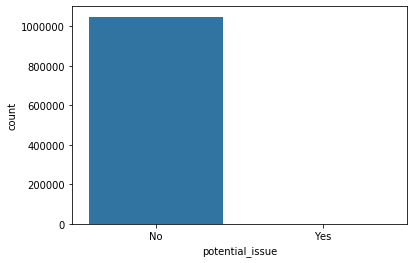

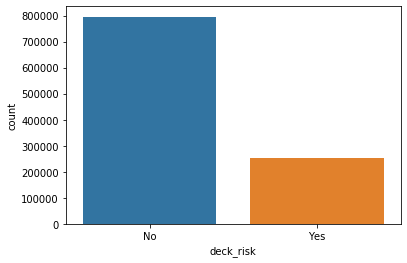

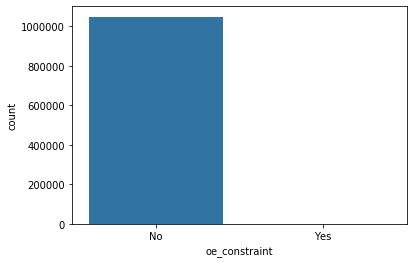

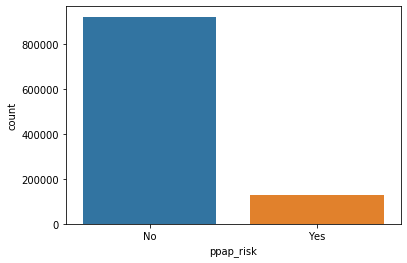

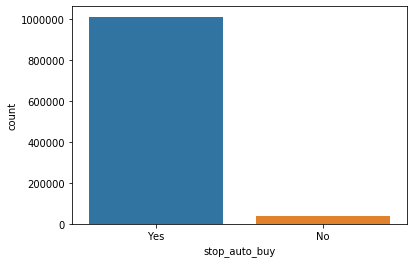

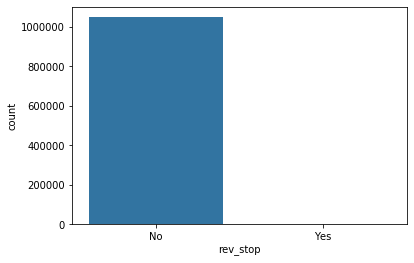

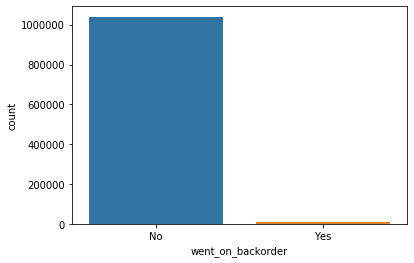

In [13]:
for i in obj:
    plt.figure()
    sns.countplot(obj[i])

In [14]:
df['went_on_backorder'].value_counts()

No     1039675
Yes       8900
Name: went_on_backorder, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021F8B106F08>,
      dtype=object)

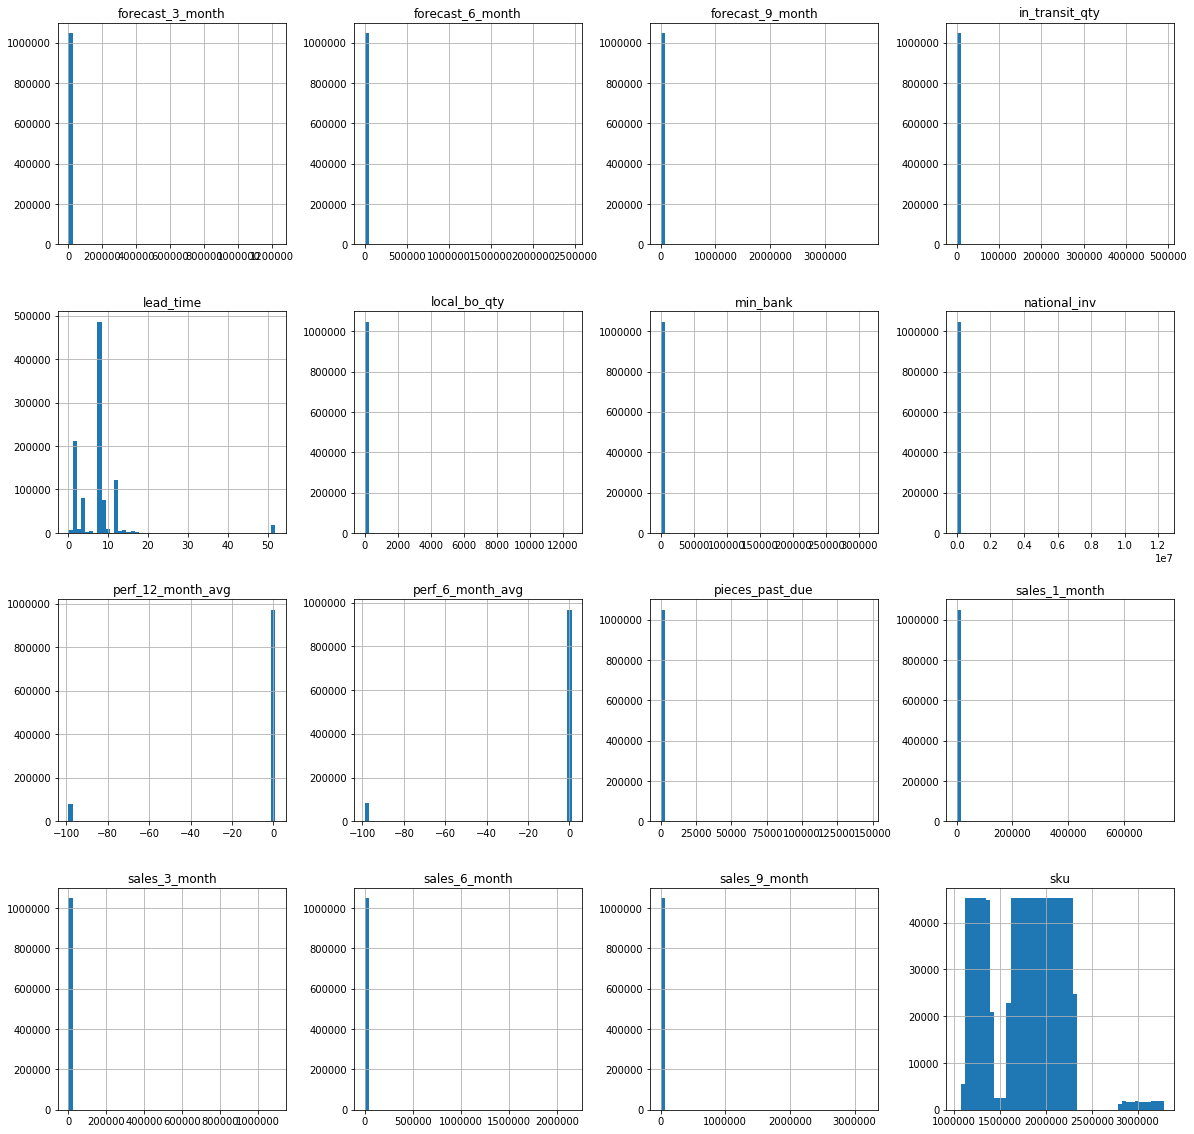

In [15]:
num.hist(bins=50,figsize=(20,20))

In [16]:
from sklearn.preprocessing import LabelEncoder
for i in obj:
    df[i]=LabelEncoder().fit_transform(df[i])

In [17]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [18]:
from sklearn.preprocessing import MinMaxScaler
X=MinMaxScaler(feature_range=(-1,1)).fit_transform(X)

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,np.array(Y),test_size=0.2,random_state=42,shuffle=True)

In [20]:
from keras.models import Sequential 
from keras.layers import Dense,Dropout

Using TensorFlow backend.
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as

In [21]:
model=Sequential()
model.add(Dense(40,input_dim=22,activation='relu'))
model.add(Dense(22,activation='relu'))
model.add(Dense(22,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                920       
_________________________________________________________________
dense_2 (Dense)              (None, 22)                902       
_________________________________________________________________
dense_3 (Dense)              (None, 22)                506       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 23        
Total params: 2,351
Trainable params: 2,351
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss='hinge',optimizer='adam',metrics=['accuracy'])
model=model.fit(X_train,Y_train,validation_split=0.2,epochs=10,batch_size=10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 671088 samples, validate on 167772 samples
Epoch 1/10
671088/671088 [==============================] - 663s 988us/step - loss: 1.0001 - accuracy: 0.9915 - val_loss: 1.0000 - val_accuracy: 0.9917
Epoch 2/10
671088/671088 [==============================] - 760s 1ms/step - loss: 1.0000 - accuracy: 0.9915 - val_loss: 1.0000 - val_accuracy: 0.9917
Epoch 3/10
671088/671088 [==============================] - 745s 1ms/step - loss: 1.0000 - accuracy: 0.9915 - val_loss: 1.0000 - val_accuracy: 0.9917
Epoch 4/10
671088/671088 [==============================] - 729s 1ms/step - loss: 1.0000 - accuracy: 0.9915 - val_loss: 1.0000 - val_accuracy: 0.9917
Epoch 5/10
671088/671088 [==============================] - 678s 1ms/step - loss: 1.0000 - accuracy: 0.9915 - val_loss: 1.0000 - val_accuracy: 0.9917
Epoch 6/10
671088/671088 [==============================] - 697s 1ms/step - loss: 1.0000 - accuracy: 

In [27]:
y_predict=model.predict(x_test)

AttributeError: 'History' object has no attribute 'predict'

No handles with labels found to put in legend.


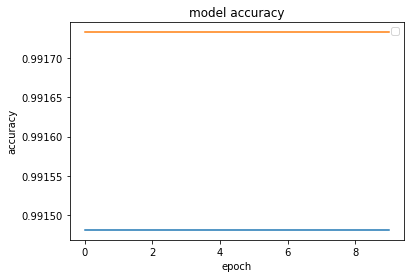

In [24]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

No handles with labels found to put in legend.


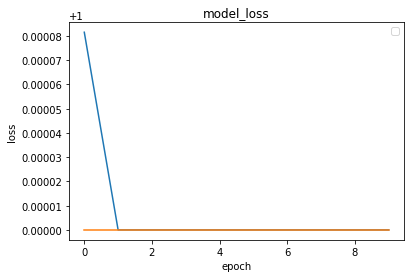

In [25]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()